# Trade Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv')

In [3]:
df

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000
...,...,...,...,...,...,...,...,...,...,...
111433,Reimports,2021,11/12/2021,Saturday,All,All,All,$,0,165000000
111434,Reimports,2021,12/12/2021,Sunday,All,All,All,$,0,165000000
111435,Reimports,2021,13/12/2021,Monday,All,All,All,$,2000000,166000000
111436,Reimports,2021,14/12/2021,Tuesday,All,All,All,$,1000000,167000000


In [4]:
df.rename(columns= {'Transport_Mode' : 'Transport Mode'}, inplace = True )

In [5]:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


In [6]:
#Converting into datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18988\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df.head()


,Direction,Year,Date,Weekday,Country,Commodity,Transport Mode,Measure,Value,Cumulative
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,2015-02-01,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,2015-03-01,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,2015-04-01,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,2015-05-01,Monday,All,All,All,$,105000000,442000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111438 entries, 0 to 111437
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Direction       111438 non-null  object        
 1   Year            111438 non-null  int64         
 2   Date            111438 non-null  datetime64[ns]
 3   Weekday         111438 non-null  object        
 4   Country         111438 non-null  object        
 5   Commodity       111438 non-null  object        
 6   Transport Mode  111438 non-null  object        
 7   Measure         111438 non-null  object        
 8   Value           111438 non-null  int64         
 9   Cumulative      111438 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 8.5+ MB


In [9]:
df["Country"].describe()

count     111438
unique         9
top          All
freq       50801
Name: Country, dtype: object

In [10]:
print(df['Country'].unique())

['All' 'China' 'Australia' 'United States' 'Japan' 'United Kingdom'
 'European Union (27)' 'East Asia (excluding China)'
 'Total (excluding China)']


In [11]:
df['Transport Mode'].unique()

array(['All', 'Air', 'Sea'], dtype=object)

In [12]:
print(df['Commodity'].unique())

['All' 'Milk powder, butter, and cheese' 'Meat and edible offal'
 'Logs, wood, and wood articles' 'Fish, crustaceans, and molluscs' 'Fruit'
 'Non-food manufactured goods' 'Mechanical machinery and equip'
 'Electrical machinery and equip']


In [15]:
grouped_sum= df.groupby(['Country','Transport Mode'])['Value'].sum().reset_index()
print(grouped_sum)

                        Country Transport Mode          Value
0                           All            Air   132602000000
1                           All            All  1514387349000
2                           All            Sea   668400000000
3                     Australia            All   107686000000
4                         China            All   282769573000
5   East Asia (excluding China)            All   116562137000
6           European Union (27)            All    26644000000
7                         Japan            All    23155000000
8       Total (excluding China)            All   291991000000
9                United Kingdom            All    21591000000
10                United States            All    52321338000


In [16]:
grouped_avg = df.groupby(['Year'])[['Value','Cumulative']].mean().reset_index()
print(grouped_avg)

   Year         Value    Cumulative
0  2015  2.550866e+07  4.594115e+09
1  2016  2.518743e+07  4.591304e+09
2  2017  2.781532e+07  4.926312e+09
3  2018  3.015929e+07  5.392358e+09
4  2019  3.121065e+07  5.638055e+09
5  2020  2.987004e+07  5.447914e+09
6  2021  3.385023e+07  5.649061e+09


In [17]:
df['Month Name'] = df['Date'].dt.month_name()

In [19]:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport Mode,Measure,Value,Cumulative,Month Name
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,January
1,Exports,2015,2015-02-01,Friday,All,All,All,$,96000000,200000000,February
2,Exports,2015,2015-03-01,Saturday,All,All,All,$,61000000,262000000,March
3,Exports,2015,2015-04-01,Sunday,All,All,All,$,74000000,336000000,April
4,Exports,2015,2015-05-01,Monday,All,All,All,$,105000000,442000000,May


In [20]:
total_count = df.groupby(['Weekday'])['Commodity'].count().reset_index()
print(total_count)

     Weekday  Commodity
0     Friday      15959
1     Monday      15931
2   Saturday      15873
3     Sunday      15925
4   Thursday      15919
5    Tuesday      15934
6  Wednesday      15897


In [21]:
sorted_total_count = total_count.sort_values(by = 'Commodity', ascending = False)
print(sorted_total_count)

     Weekday  Commodity
0     Friday      15959
5    Tuesday      15934
1     Monday      15931
3     Sunday      15925
4   Thursday      15919
6  Wednesday      15897
2   Saturday      15873


Q1- What was the total value of exports for each year?

In [24]:
total_export_per_year =df.loc[df['Direction'] == 'Exports',['Year','Value']].groupby('Year')["Value"].sum()

#filters the DataFrame to include only rows where the 'Direction' is 'Exports', and selects the 'Year' and 'Value' columns.
#groups the filtered data by the 'Year' column.
# applies the sum aggregation function to the 'Value' column.

print(total_export_per_year)

Year
2015    230137052000
2016    227086143000
2017    252018007000
2018    269370678000
2019    281446924000
2020    282173545000
2021    286428048000
Name: Value, dtype: int64


Q2. What was the average value of reimports on Saturdays?

In [140]:
avg_reimports_saturdays = df.loc[(df['Direction'] == 'Reimports') & (df['Weekday'] == 'Saturday'),'Value'].mean()

#filters the DataFrame to include only rows where the 'Direction' is 'Reimports' and the 'Weekday' is 'Saturday', and selects the 'Value' column.
#calculates the mean (average) of the selected 'Value' column.

print("The average value of reimports on saturday is :",avg_reimports_saturdays)

The average value of reimports on saturday is : 75000.0


Q3. Which country had the highest total value of exports for a given year?

In [26]:
max_export_country = (
    df.loc[(df['Year']) & (df['Direction'] == 'Exports'),['Country','Value']]
    .groupby('Country')['Value']
    .sum()
    .idxmax()
)

print(f"The country with the highest total value of exports was: {max_export_country}")  

The country with the highest total value of exports was: All


In [27]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Annual Analysis :

Q4. What is the total value of transactions for each year?

In [28]:
total_value_by_year = df.groupby('Year')['Value'].sum().reset_index()

#Group by the 'Year' column.
#apply aggregated Sum the 'Value' column for each year.

print(total_value_by_year)

   Year         Value
0  2015  408266052000
1  2016  403704143000
2  2017  444906007000
3  2018  483121678000
4  2019  499900924000
5  2020  478846545000
6  2021  519364048000


Q5. How has the cumulative value changed each year?

In [29]:
cumulative_value_changes = df.groupby('Year')['Value'].cumsum().reset_index()

print(cumulative_value_changes)

         index         Value
0            0     104000000
1            1     200000000
2            2     261000000
3            3     335000000
4            4     440000000
...        ...           ...
111433  111433  519360048000
111434  111434  519360048000
111435  111435  519362048000
111436  111436  519363048000
111437  111437  519364048000

[111438 rows x 2 columns]


Trend Analysis :

Q6. What are the monthly trends in the value of exports and reimports?

In [30]:
#Combine year and month into a single 'Month-Year' column
df['Month-Year'] = df['Year'].astype(str) + '-' + df['Month Name'].astype(str)

# Calculate monthly totals for exports and reimports
monthly_totals = df.groupby(['Month-Year','Direction'])['Value'].sum().unstack()

# Print the monthly trends (assuming 'Value' represents trade value)
print(monthly_totals)

Direction           Exports      Imports  Reimports
Month-Year                                         
2015-April      18214234000  13984000000   22000000
2015-August     17603933000  15728000000   23000000
2015-December   20438141000  14009000000   12000000
2015-February   18639135000  13677000000   19000000
2015-January    19872884000  15438000000   16000000
...                     ...          ...        ...
2021-March      27230213000  19318000000   22000000
2021-May        26648683000  18401000000   10000000
2021-November   26314840000  20164000000   14000000
2021-October    24711720000  21929000000   13000000
2021-September  22385891000  22564000000   14000000

[84 rows x 3 columns]


Weekday Analysis:

Q7. What is the average value of transactions for each weekday?

In [32]:
avg_value_weekday = df.groupby('Weekday')['Value'].mean().reset_index()

print(avg_value_weekday)

     Weekday         Value
0     Friday  3.340671e+07
1     Monday  3.557595e+07
2   Saturday  1.627085e+07
3     Sunday  1.944868e+07
4   Thursday  3.343985e+07
5    Tuesday  3.266672e+07
6  Wednesday  3.254595e+07


Q8. How many transactions occur on each weekday?

In [33]:
weekday_count = df['Weekday'].value_counts()

print(weekday_count)

Friday       15959
Tuesday      15934
Monday       15931
Sunday       15925
Thursday     15919
Wednesday    15897
Saturday     15873
Name: Weekday, dtype: int64


Country-wise Analysis:

Q9. Which countries are most frequently involved in transactions?

In [34]:
#Count the number of transactions for each country
country_counts = df['Country'].value_counts()

# Print the results (sorted by count in descending order)
print(country_counts.sort_values(ascending = False))

All                            50801
China                          27736
East Asia (excluding China)     7617
United States                   7499
Australia                       5082
United Kingdom                  5080
Japan                           2541
European Union (27)             2541
Total (excluding China)         2541
Name: Country, dtype: int64


Q10. What is the total value of transactions per country?

In [36]:
country_totals = df.groupby('Country')['Value'].sum()

print(country_totals)

Country
All                            2315389349000
Australia                       107686000000
China                           282769573000
East Asia (excluding China)     116562137000
European Union (27)              26644000000
Japan                            23155000000
Total (excluding China)         291991000000
United Kingdom                   21591000000
United States                    52321338000
Name: Value, dtype: int64


Commodity Analysis:

Q11. What are the most frequently traded commodities?

In [38]:
commodity_counts = df['Commodity'].value_counts()

print(commodity_counts.sort_values(ascending = False))

All                                45720
Milk powder, butter, and cheese    15132
Meat and edible offal              15100
Logs, wood, and wood articles      10108
Fish, crustaceans, and molluscs     7600
Non-food manufactured goods         5082
Electrical machinery and equip      5079
Mechanical machinery and equip      5076
Fruit                               2541
Name: Commodity, dtype: int64


Q12. What is the total value of transactions for each commodity?

In [40]:
commodity_totals = df.groupby('Commodity')['Value'].sum().reset_index()

print(commodity_totals)

                         Commodity          Value
0                              All  2386667000000
1   Electrical machinery and equip    51554000000
2  Fish, crustaceans, and molluscs    15446832000
3                            Fruit    22197000000
4    Logs, wood, and wood articles    50645402000
5            Meat and edible offal    78522372000
6   Mechanical machinery and equip    72603000000
7  Milk powder, butter, and cheese   157319791000
8      Non-food manufactured goods   403154000000


Transport Mode Analysis:

Q13. How is the transaction value distributed across different transport modes?

In [41]:
total_transport_mode_value = df.groupby('Transport Mode')['Value'].sum()

print(total_transport_mode_value)

Transport Mode
Air     132602000000
All    2437107397000
Sea     668400000000
Name: Value, dtype: int64


Q14. Which transport mode has the highest average transaction value?

In [42]:
transport_mode_avg = df.groupby('Transport Mode')['Value'].mean()

print("The highest average value transport mode is:",transport_mode_avg.idxmax())

The highest average value transport mode is: Sea


Measure Analysis:

Q15. What measures are most commonly used in transactions?

In [43]:
df['Measure'].unique()

array(['$', 'Tonnes'], dtype=object)

In [46]:
count_measure = df['Measure'].value_counts()
mostly_used_measure = count_measure.idxmax()

print(mostly_used_measure)

$


Q16. What is the total value of transactions for each measure?


In [48]:
measures_total_value = df.groupby('Measure')['Value'].sum().reset_index()

print(measures_total_value)

  Measure          Value
0       $  3237797000000
1  Tonnes      312397000


Cumulative Value Analysis:

Q17. How does the cumulative value change over time? 

In [49]:
yearly_cumulative_change = df.groupby('Year')['Cumulative'].sum()

print(yearly_cumulative_change)

Year
2015    73528808754000
2016    73589415681000
2017    78796366714000
2018    86380178521000
2019    90304728425000
2020    87335509776000
2021    86673544129000
Name: Cumulative, dtype: int64


Q18. What is the trend in cumulative values by year and by month?

In [53]:
#Combine year and month into a single 'Month-Year' column
df['Month-Year'] = df['Year'].astype(str) + '-' + df['Month Name'].astype(str)

#grouping month-year by cumulative trend
month_year_cumulative = df.groupby('Month-Year')['Cumulative'].sum().reset_index()

print(month_year_cumulative)


        Month-Year      Cumulative
0       2015-April   4442095621000
1      2015-August   7204379821000
2    2015-December   9939298157000
3    2015-February   3065439668000
4     2015-January   2597636835000
..             ...             ...
79      2021-March   4906585737000
80        2021-May   6639819931000
81   2021-November  11606196900000
82    2021-October  11106851437000
83  2021-September   9822759372000

[84 rows x 2 columns]


Peak Analysis:

Q19. What are the peak periods (months/weeks) for transaction values?

In [57]:
df['Month-Weekday'] = df['Month Name'].astype(str) + '-' + df['Weekday'].astype(str)

month_Week_value = df.groupby('Month-Weekday')['Value'].sum().reset_index()

print(month_Week_value)

          Month-Weekday        Value
0          April-Friday  41540645000
1          April-Monday  43645148000
2        April-Saturday  21895539000
3          April-Sunday  24844191000
4        April-Thursday  44251398000
..                  ...          ...
79   September-Saturday  19036132000
80     September-Sunday  21500704000
81   September-Thursday  46016850000
82    September-Tuesday  41864053000
83  September-Wednesday  39962283000

[84 rows x 2 columns]


Q20. How do transaction values vary across different seasons or quarters of the year?

In [60]:
#crate a another column 'Season' and give seasons accordind to the month name
def get_season(month):
    if month in ['March']:
        return 'Spring'
    elif month in ['April', 'May']:
        return 'Summer'
    elif month in ['June', 'July', 'August', 'September']:
        return 'Monsoon'
    elif month in ['October', 'November']:
        return 'Autumn'
    elif month in ['December', 'January', 'February']:
        return 'Winter Season'
    
df['Season'] = df['Month Name'].apply(get_season)

In [62]:
#create a another column for quater
df['Quarter'] = df['Date'].dt.quarter

In [63]:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport Mode,Measure,Value,Cumulative,Month Name,Month-Year,Month-Weekday,Season,Quarter
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,January,2015-January,January-Thursday,Winter Season,1
1,Exports,2015,2015-02-01,Friday,All,All,All,$,96000000,200000000,February,2015-February,February-Friday,Winter Season,1
2,Exports,2015,2015-03-01,Saturday,All,All,All,$,61000000,262000000,March,2015-March,March-Saturday,Spring,1
3,Exports,2015,2015-04-01,Sunday,All,All,All,$,74000000,336000000,April,2015-April,April-Sunday,Summer,2
4,Exports,2015,2015-05-01,Monday,All,All,All,$,105000000,442000000,May,2015-May,May-Monday,Summer,2


In [68]:
season_transaction_value = df.groupby('Season')['Value'].sum().reset_index()
print("Seasonal Transaction Value:")
print(season_transaction_value)


Seasonal Transaction Value:
          Season          Value
0         Autumn   564086636000
1        Monsoon  1068945106000
2         Spring   273774866000
3         Summer   541455171000
4  Winter Season   789847618000


In [69]:
quarter_transaction_value = df.groupby('Quarter')['Value'].sum().reset_index()
print("Quartrly Transaction value: ")
print(quarter_transaction_value)

Quartrly Transaction value: 
   Quarter         Value
0        1  808501078000
1        2  806453297000
2        3  803946980000
3        4  819208042000


Comparative Analysis:

Q21. How do the values of exports compare to reimports over the same period?

In [70]:
# Calculate total value for exports and reimports
total_exports = df[df['Direction'] == 'Exports']['Value'].sum()
total_reimports = df[df['Direction'] == 'Reimports']['Value'].sum()

In [71]:
# Print the comparison
print("Total Value of Exports:", total_exports)
print("Total Value of Reimports:", total_reimports)

Total Value of Exports: 1828660397000
Total Value of Reimports: 1288000000


In [73]:
# Prepare data for visualization
directions = ['Exports', 'Reimports']
values = [total_exports, total_reimports]

In [74]:
import matplotlib.pyplot as plt

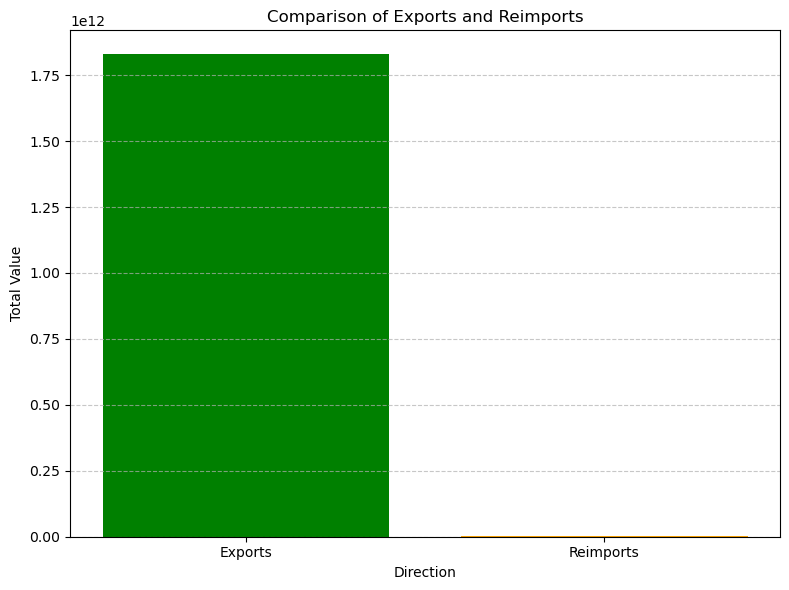

In [81]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(directions, values, color=['green', 'orange'])
plt.xlabel('Direction')
plt.ylabel('Total Value')
plt.title('Comparison of Exports and Reimports')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization

# Display the chart
plt.tight_layout()
plt.show()

Q22. What is the percentage change in transaction values year over year?


In [89]:
# Calculate yearly sum of transaction values
df_yearly_sum = df.groupby('Year')['Value'].sum()

# Calculate YoY percentage change (assuming data starts from year 2022)
yoy_change = df_yearly_sum.pct_change(1) * 100  # Percentage change multiplied by 100

# Prepare data for visualization (exclude the first year)
years = yoy_change.index[1:]  # Extract years starting from the second year
percentage_changes = yoy_change[1:].tolist()  # Extract percentage changes

print(years)
print(percentage_changes)


Int64Index([2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Year')
[-1.117386316509117, 10.205955206161965, 8.589605534366274, 3.4730890299648376, -4.211710358831022, 8.46147965837365]


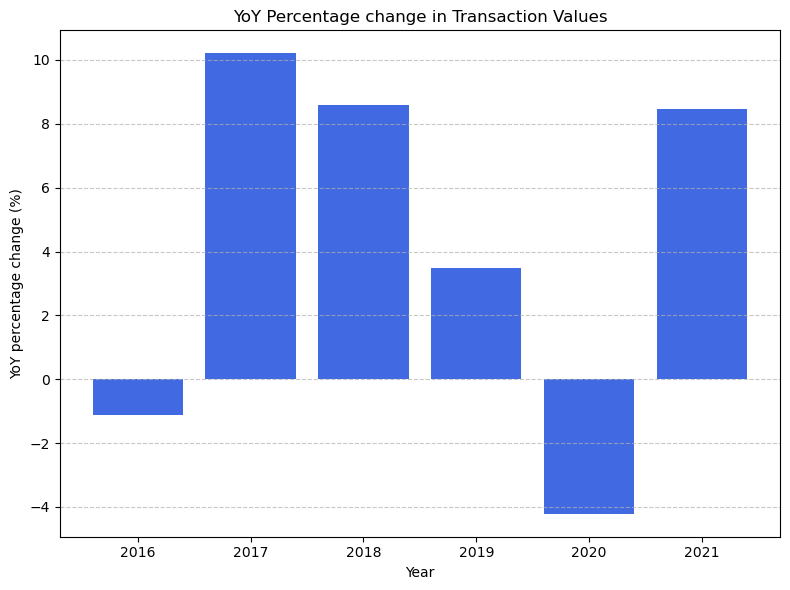

In [85]:
# Create a bar chart
plt.figure(figsize =(8,6))
plt.bar(years, percentage_changes, color ='royalblue')
plt.xlabel('Year')
plt.ylabel('YoY percentage change (%)')
plt.title('YoY Percentage change in Transaction Values')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add gridlines for better visualization

#Display the chart
plt.tight_layout()
plt.show()

Correlation Analysis:

Q23. Is there any correlation between the day of the week and the transaction value?

In [92]:
import numpy as np

In [98]:
# Convert WeekDay to category and get category codes
weekday_codes = df['Weekday'].astype('category').cat.codes

#Calculate the correlation coefficient
correlation = weekday_codes.corr(df['Value'])

#print the correlation coefficient
print("Correlation Coefficient between Day of Week and Transaction Value: ",correlation)

Correlation Coefficient between Day of Week and Transaction Value:  0.011769086350185042


In [99]:
#Interpret the correlation
if abs(correlation) < 0.2:
    print("There is a weak or negligible correlation.")
elif 0.2 <= abs(correlation) < 0.5:
    print("There is a fair correlation.")
elif 0.5 <= abs(correlation) < 0.8:
    print("There is a moderate correlation.")
elif 0.8 <= abs(correlation) < 1:
    print("This is a very strong correlation.")

There is a weak or negligible correlation.


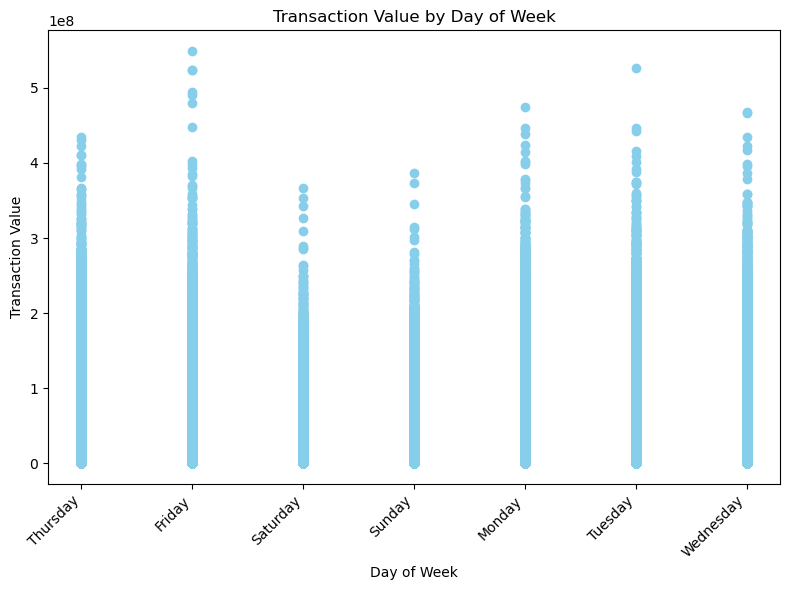

In [102]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Weekday'], df['Value'], color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Value')
plt.title('Transaction Value by Day of Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

Q24. How do different variables (e.g., country, transport mode) correlate with the transaction value?

In [131]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['Country', 'Transport Mode'])

In [132]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_18988\3925830937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


In [133]:
# Extract only the correlations with 'transaction_value'
transaction_value_correlations = correlation_matrix[['Value']]

In [134]:
# Filter the correlations to include only 'country' and 'transport_mode'
filtered_correlations = transaction_value_correlations[
    transaction_value_correlations.index.str.startswith('Country') | 
    transaction_value_correlations.index.str.startswith('Transport Mode')
]

In [135]:
print(filtered_correlations)

                                        Value
Country_All                          0.287077
Country_Australia                   -0.032652
Country_China                       -0.206144
Country_East Asia (excluding China) -0.070732
Country_European Union (27)         -0.053860
Country_Japan                       -0.057842
Country_Total (excluding China)      0.248986
Country_United Kingdom              -0.102931
Country_United States               -0.112600
Transport Mode_Air                  -0.012305
Transport Mode_All                  -0.299224
Transport Mode_Sea                   0.425238


In [136]:
import seaborn as sns

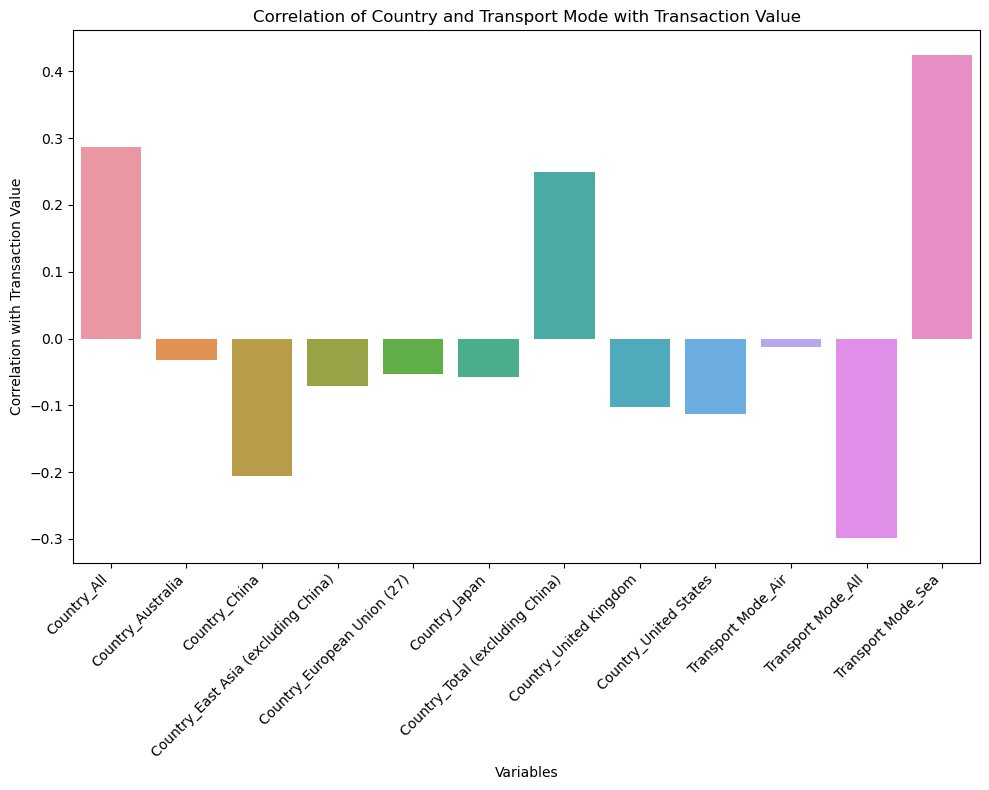

In [138]:
# Plot the filtered correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_correlations.index, y=filtered_correlations['Value'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Correlation with Transaction Value')
plt.title('Correlation of Country and Transport Mode with Transaction Value')
plt.tight_layout()
plt.show()

In [139]:
#The above code will produce a bar chart showing the correlation of country and transport_mode variables with transaction_value. 
#Each bar represents the correlation value of a specific country or transport_mode category with transaction_value. 
#Adjust the data and plotting parameters as necessary to fit your dataset and visualization preferences.

##### Aman Choudhary
Email - amanchoudhary11189.ac@gmail.com

Linkedin - https://www.linkedin.com/in/aman-choudhary-61a9361a0/